Shape of X_train:  (50000, 32, 32, 3)
Shape of Y_train:  (50000, 10)
Shape of X_test:  (10000, 32, 32, 3)
Shape of Y_test:  (10000, 10)


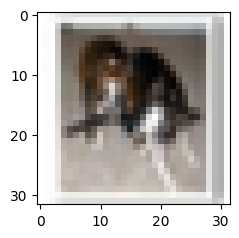

In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical


# Load CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train, 10)  # 10 is the number of classes in CIFAR-10
Y_test = to_categorical(Y_test, 10)

print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

# Display a random image from the training set with a larger size
idx = random.randint(0, len(X_train))
plt.figure(figsize=(2.5, 2.5))  # Adjust the figure size as needed
plt.imshow(X_train[idx])
plt.show()

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
model.fit(X_train, Y_train, epochs=5, batch_size=64)

loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5511 - accuracy: 0.4448
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1856 - accuracy: 0.5846
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0449 - accuracy: 0.6349
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9633 - accuracy: 0.6651
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9007 - accuracy: 0.6888
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8480 - accuracy: 0.7071
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8010 - accuracy: 0.7235
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7630 - accuracy: 0.7349
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7263 - accuracy: 0.7511
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.694